# Lectures 1 and 2: Descriptive statistics and probability distribution

# 1. Densities and CDF

These are the libraries we will need:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

We start with a probability measure/distribution with a finite support. Experiment by changing the values of $N$ and $p$.

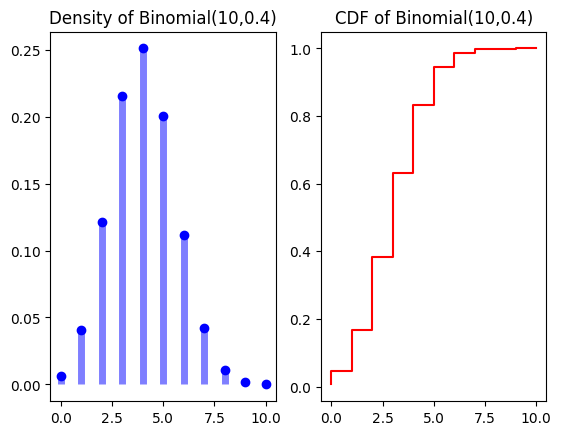

In [2]:
from scipy.stats import binom
N = 10
p = 0.4
x = [i for i in range(N+1)]
y = binom.pmf(x, N, p)
z = binom.cdf(x, N, p)
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x,y,'bo')
ax1.vlines(x, 0, y, colors='b', lw=5, alpha=0.5)
ax1.set_title("Density of Binomial(" + str(N) + "," + str(p) + ")")
# Note that the method "step" is called: the CDF of a discrete distribution is a step function.
ax2.step(x,z, 'r')
ax2.set_title("CDF of Binomial(" + str(N) + "," + str(p) + ")")
plt.show()

Next, let's consider a distribution with discrete but infinite support. Experiment with the parameter $\lambda$ (the variable $l$).

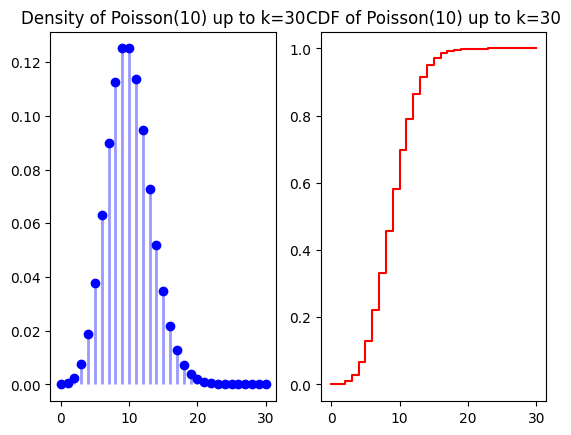

In [3]:
from scipy.stats import poisson
l = 10
N = 30
x = [i for i in range(N+1)]
y = poisson.pmf(x, l)
z = poisson.cdf(x, l)
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x,y,'bo')
ax1.vlines(x, 0, y, colors='b', lw=2, alpha=0.4)
ax1.set_title("Density of Poisson(" + str(l) + ") up to k=" + str(N))
# Note that the method "step" is called: the CDF of a discrete distribution is a step function.
ax2.step(x,z,'r')
ax2.set_title("CDF of Poisson(" + str(l) + ") up to k=" + str(N))
plt.show()

Let us now consider a continuous distribution supported on a bounded interval.

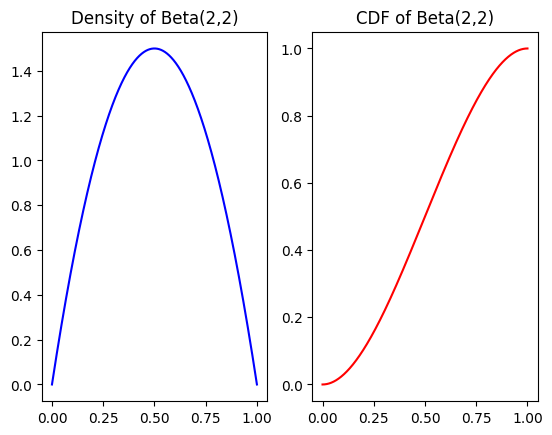

In [4]:
from scipy.stats import beta
a, b = 2, 2
x = np.linspace(0,1,10000)
y = beta.pdf(x, a, b)
z = beta.cdf(x, a, b)
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x,y, 'b')
ax1.set_title("Density of Beta("+str(a)+","+str(b)+")")
# Note that the method "plot" is now called: the CDF of a continuous distribution is a continuous function.
ax2.plot(x,z, 'r')
ax2.set_title("CDF of Beta("+str(a)+","+str(b)+")")
plt.show()

Finally, let us consider the normal distribution, a continuous distribution with infinite support. Experiment with $\sigma$ (the variable $\mathtt{sigma}$), $\mu$ simply shifts the distribution along the x-axis.

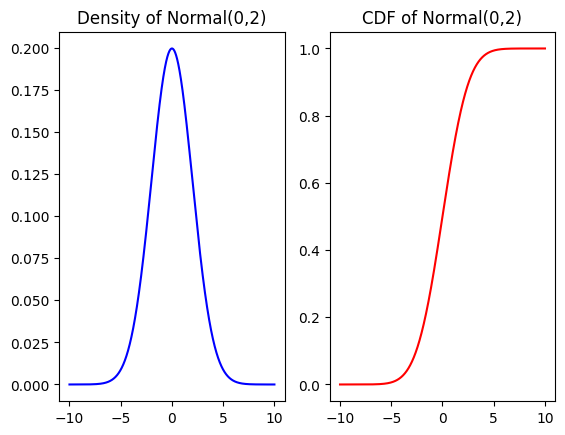

In [5]:
from scipy.stats import norm
mu, sigma = 0, 2
x = np.linspace(-(mu+5*sigma),mu+5*sigma,10000)
y = norm.pdf(x, mu, sigma)
z = norm.cdf(x, mu, sigma)
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x,y, 'b')
ax1.set_title("Density of Normal("+str(mu)+","+str(sigma)+")")
ax2.plot(x,z, 'r')
ax2.set_title("CDF of Normal("+str(mu)+","+str(sigma)+")")
plt.show()

# 2. Sampling

## 2.1. Call a Pseudo-Random Number Generator (PRNG)

We seed Numpy's PRNG (a so-called Permuted Congruential Generator) and generate two samples.

In [6]:
seed = 12345
rng = np.random.default_rng(seed)
print(rng)
print(rng.random())
print(rng.random())

Generator(PCG64)
0.22733602246716966
0.31675833970975287


By changing the seed we see that the PRNG is deterministic: it looks random, but it is really a deterministic function.

In [7]:
seed = 12346
rng = np.random.default_rng(seed)
print("New seed:")
print(rng.random())
print(rng.random())
seed = 12345
rng = np.random.default_rng(seed)
print("Old seed:")
print(rng.random())
print(rng.random())

New seed:
0.4734724218871649
0.03855620856480224
Old seed:
0.22733602246716966
0.31675833970975287


## 2.2. Call built-in samplers

Numpy comes with built-in PRNGs which generate deviates approximating the distribution of well-known distributions in the frequentist limit.
For a Poisson distribution with parameter $\lambda=20$ we get the following.

The method does not give you access to the seed. You will get noticeably different samples everytime you re-run the following cells.

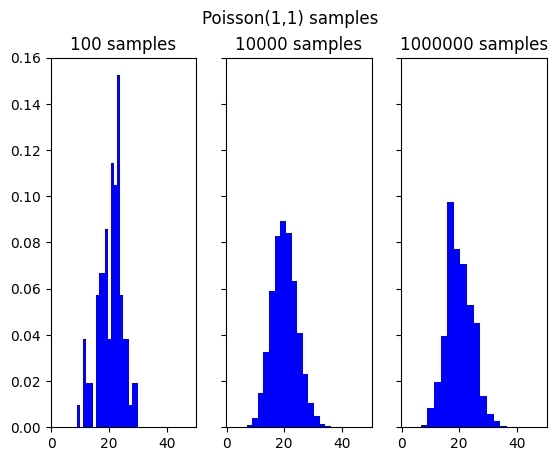

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True)
fig.suptitle("Poisson(1,1) samples")
ax1.hist(np.random.poisson(20,100),20,color='b',density=True)
ax1.set_title("100 samples")
ax2.hist(np.random.poisson(20,10000),20,color='b',density=True)
ax2.set_title("10000 samples")
ax3.hist(np.random.poisson(20,1000000),20,color='b',density=True)
ax3.set_title("1000000 samples")
plt.show()

And here is an example with a continuous distribution: the Gamma Distribution with parameters (1,1).

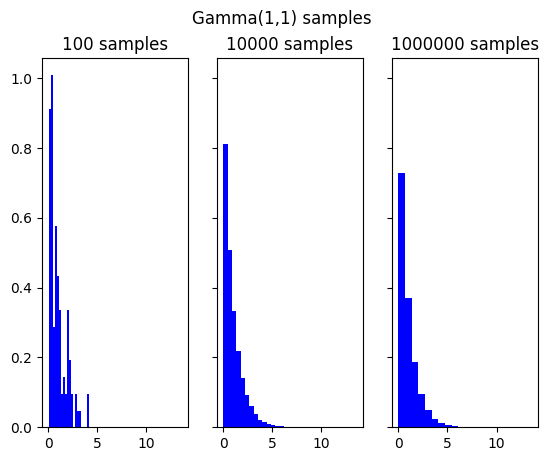

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True)
fig.suptitle("Gamma(1,1) samples")
ax1.hist(np.random.gamma(1,1,100),20,color='b',density=True)
ax1.set_title("100 samples")
ax2.hist(np.random.gamma(1,1,10000),20,color='b',density=True)
ax2.set_title("10000 samples")
ax3.hist(np.random.gamma(1,1,1000000),20,color='b',density=True)
ax3.set_title("1000000 samples")
plt.show()

## 2.3. Samples and the frequentist interpretation

We will visually check that two samplers satisfy the frequentist interpretation, i.e. that

$
\mathbb{P}(A) = \lim_{N\to\infty} \frac{1}{N} \sum_{i=1}^N 1_{A}(x_i)
$

where $x_1, x_2, \ldots$ are the samples returned by the sampler targetting $\mathbb{P}$.

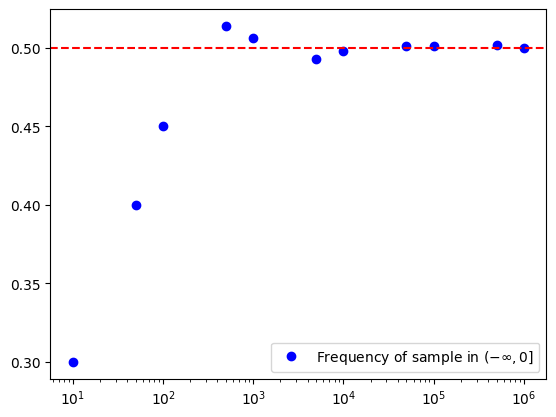

In [10]:
from scipy.stats import norm
# Array of sizes N
N = [10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000]
frequency = []
seed = 101

np.random.seed(seed=seed)
for size in N:
    samples = norm.rvs(size=size)
    frequency.append(np.count_nonzero(samples<0)/size)
    
plt.plot(N, frequency, 'o', color='blue', label=r'Frequency of sample in $(-\infty,0]$')
plt.axhline(y=0.5, color='r', linestyle='--')
plt.xscale("log")
plt.legend(loc=4)
plt.show()

Let's now look at the sampler $(1,0,1,0,1,0,1,...)$ from the slides.

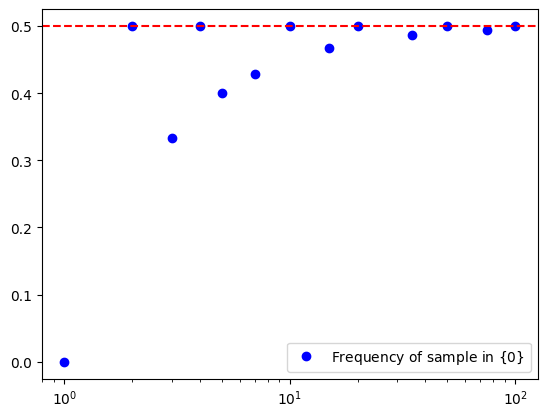

In [11]:
N = [1, 2, 3, 4, 5, 7, 10, 15, 20, 35, 50, 75, 100]
frequency = []

for size in N:
    samples = [i%2 for i in range(size)]
    frequency.append(np.sum(samples)/size)
    
plt.plot(N, frequency, 'o', color='blue', label=r'Frequency of sample in $\{0\}$')
plt.axhline(y=0.5, color='r', linestyle='--')
plt.xscale("log")
plt.legend(loc=4)
plt.show()

# 3. Centrality: mean and median

In the example below we illustrate:
- The difference between the mean and the median of a non-symmetric distribution. In this instance the Gamma distribution
- The difference between the sample mean (resp. median) and the mean (resp. median) of the distribution. Try re-running the code several time, with smaller values of $N$, and see how the sample mean differs from the distribution's mean.

Mean: 2.0
Median: 1.6783469900166612


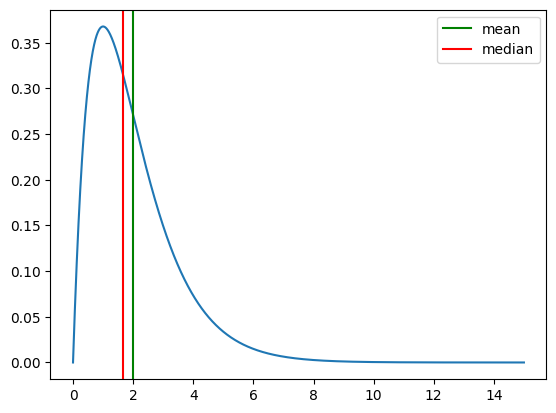

In [12]:
from scipy.stats import gamma
alpha = 2

# plot pdf
x = np.linspace(0,15,10000)
y = gamma.pdf(x,alpha)
plt.plot(x,y)

# compute mean and median
mean = gamma.mean(alpha)
median = gamma.median(alpha)
print("Mean: "+str(mean))
print("Median: "+str(median))
plt.axvline(x=mean, color='green', label='mean')
plt.axvline(x=median, color='red', label='median')
plt.legend()
plt.show()


## 4. Dispersion and Higher Moment

In [13]:
from scipy.stats import norm
mu, sigma = 0, 1
r = norm.rvs(mu,sigma,1000)
var, skew, kurtosis = norm.stats(mu,sigma,'vsk')

print("Standard Deviation: "+str(np.sqrt(var)))
print("Skew: "+str(skew))
print("(Excess) Kurtosis: "+str(kurtosis))

Standard Deviation: 1.0
Skew: 0.0
(Excess) Kurtosis: 0.0


# 5. Important Probability Distributions

## 5.1. Finite support: the Binomial distribution

Let's look at the density (a.k.a. the probability mass function) of binomial distributions with $N=20$ and varying values of the parameter $p$. As expected when $p=0.5$, the mean of the distribution is 10. This makes good intuitive sense if you remember that $\mathrm{Binom}(N,p)$ is the sum of $N$ Bernoulli distributions with parameter $p$.

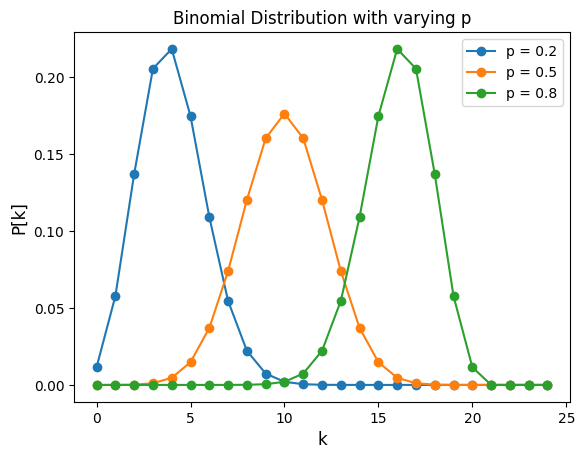

In [14]:
for p in [0.2, 0.5, 0.8]:
    x = np.arange(0, 25)
    binom = stats.binom.pmf(x, 20, p)
    plt.plot(x, binom, '-o', label="p = {:.1f}".format(p))
    plt.xlabel('k', fontsize=12)
    plt.ylabel('P[k]', fontsize=12)
    plt.title("Binomial Distribution with varying p")
    plt.legend()

## 5.2. Countable support: the Poisson distribution

We now consider the Poisson distribution with varying values for the parameter $\lambda$. Poisson distributions are often used to model the number of occurence of an event by units of time. For example in the chart below, think of $\lambda$ as the number of TFL busses arriving at your bus stop every 10 minutes. Typically, this will be $\lambda \approx 1$. As can be seen in the chart below, when $\lambda = 1$ the probability of seeing 3 busses in 10 minutes (i.e. $P[k=3])$) is around 6%.

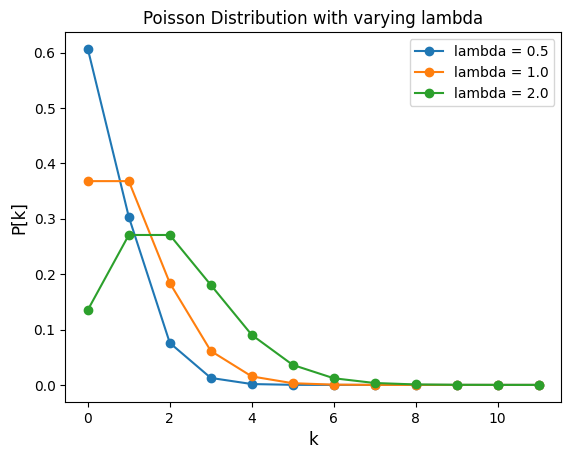

In [15]:
for l in [0.5, 1, 2]:
    x = np.arange(0, 12)
    pois = stats.poisson.pmf(x,l)
    plt.plot(x, pois, '-o', label="lambda = {:.1f}".format(l))
    plt.xlabel('k', fontsize=12)
    plt.ylabel('P[k]', fontsize=12)
    plt.title("Poisson Distribution with varying lambda")
    plt.legend()

## 5.3. Supported by a bounded interval: the Beta distribution

The Beta distribution is useful in _Bayesian learning_. Suppose you are presented with a coin of unknown bias $p$, and that you would like to learn this bias by observing a few flips. You start with no idea about where $p$ is, so you put a uniform distribution on the set $[0,1]$ of all possible bias. In Bayesian learning jargon, this is your _prior distribution_, that is to say your initial state of belief of where $p$ might be. You then flip the coin $N$ times and obtain $K$ heads and $N-K$ tails. Using _Bayes' theorem_ it can be shown that you should update your initial distribution to the distribution $\mathrm{Beta}(K, N-K)$. This becomes your new best guess of where the bias $p$ lies, i.e. you _posterior distribution_. 


With this in mind, the graph generated below becomes very intuitive: if you get 5 heads and 5 tails, there is a good change that $p$ lies around 0.5. On the other hand, if you get 9 heads and 1 tail, there is a good chance that the coin is heavily biased, with a very small value of $p$.

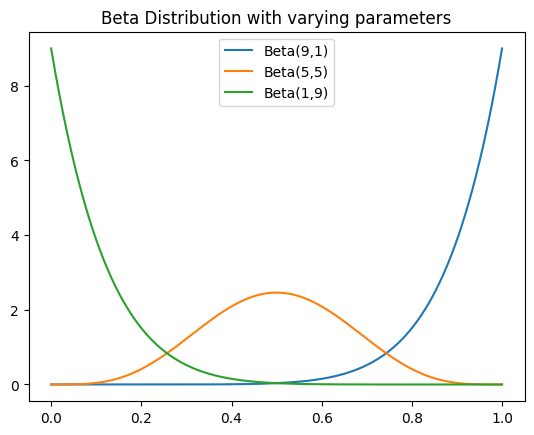

In [52]:
for params in [[9,1], [5,5], [1,9]]:
    x = np.linspace(0,1,10000)
    beta = stats.beta.pdf(x,params[0],params[1])
    plt.plot(x, beta, label="Beta({:.0f},{:.0f})".format(params[0],params[1]))
    plt.title("Beta Distribution with varying parameters")
    plt.legend()

## 5.4. Supported by $[0,\infty)$: the lognormal distribution.

As mentioned in the slides, the lognormal distribution is - perhaps confusingly - the exponential of the normal distribution. In the graphs below we plot the density (pdf) of the lognormal and compare it with the exponential function applied to samples of the normal distribution. See the scipy documentation (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html) for the details of how the parameters of $\mathtt{lognorm}$ are scaled.

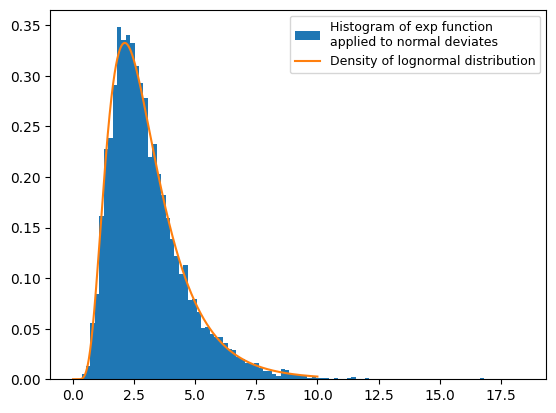

In [53]:
from scipy.stats import norm, lognorm
N = 10000
mu, sigma = 1, 0.5
r = np.exp(norm.rvs(mu,sigma,N))
counts, bins = np.histogram(r,int(N/100))
x = np.linspace(0,10,10000)
y = lognorm.pdf(x,s=sigma,scale = np.exp(mu))
plt.hist(bins[:-1], bins, weights=counts,density=True, label="Histogram of exp function \napplied to normal deviates")
plt.plot(x,y, label="Density of lognormal distribution")
plt.legend(loc=1,prop={'size': 9})
plt.show()

## 5.5. Supported by $(-\infty,\infty)$

As in the previous example we illustrate how a distribution can be obtained by applying a function to another distribution. In this case we illustrate how the standard Cauchy distribution can be obtained as the quotient of two standard normal distributions. Note also that the Cauchy distribution hasn't got a mean ($\mathtt{nan}$ means not a number.).

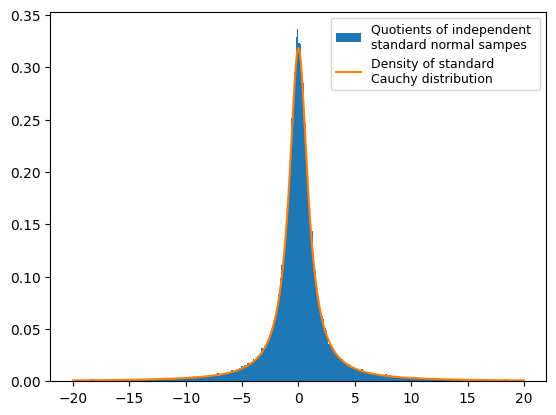

Mean: nan


In [54]:
from scipy.stats import norm, cauchy
N = 100000
mu, sigma = 0, 1
r1 = norm.rvs(mu,sigma,N)
r2 = norm.rvs(mu,sigma,N)
quot = r1 / r2
# division, especially by numbers close to 0, can cause numerical instabilities, so I'm filtering out some outliers
quot = np.extract(np.abs(quot) < 20, quot)
counts, bins = np.histogram(quot,int(np.sqrt(N)))
x = np.linspace(-20,20,10000)
y = cauchy.pdf(x)
plt.hist(bins[:-1], bins, weights=counts,density=True, label="Quotients of independent \nstandard normal sampes")
plt.plot(x,y, label="Density of standard\nCauchy distribution")
plt.legend(loc=1,prop={'size': 9})
plt.show()
print("Mean: "+str(cauchy.mean()))

We finish by simply plotting the shape of the PDF of some well-known distributions.

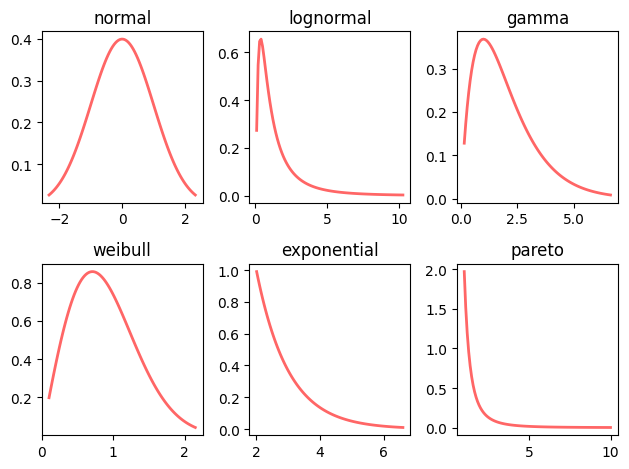

In [55]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import binom, poisson
from scipy.stats import norm, gamma, expon, pareto, lognorm 
from scipy.stats import weibull_min as weibull

plt.figure()

plt.subplot(231)
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
plt.plot(x, norm.pdf(x), 'r-', lw=2, alpha=0.6)
plt.title('normal')

plt.subplot(232)
c = 1
x = np.linspace(lognorm.ppf(0.01,c), lognorm.ppf(0.99,c), 100)
plt.plot(x, lognorm.pdf(x,c), 'r-', lw=2, alpha=0.6)
plt.title('lognormal')

plt.subplot(233)
c = 2
x = np.linspace(gamma.ppf(0.01,c), gamma.ppf(0.99,c), 100)
plt.plot(x, gamma.pdf(x,c), 'r-', lw=2, alpha=0.6)
plt.title('gamma')

plt.subplot(234)
c = 2
x = np.linspace(weibull.ppf(0.01,c), weibull.ppf(0.99,c), 100)
plt.plot(x, weibull.pdf(x,c), 'r-', lw=2, alpha=0.6)
plt.title('weibull')

plt.subplot(235)
c = 2
x = np.linspace(expon.ppf(0.01,c), expon.ppf(0.99,c), 100)
plt.plot(x, expon.pdf(x,c), 'r-', lw=2, alpha=0.6)
plt.title('exponential')

plt.subplot(236)
c = 2
x = np.linspace(pareto.ppf(0.01,c), pareto.ppf(0.99,c), 100)
plt.plot(x, pareto.pdf(x,c), 'r-', lw=2, alpha=0.6)
plt.title('pareto')

plt.tight_layout()
